In [1]:
import pandas as pd
import pickle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import log10, log2

def ICD10_code_to_chapter(let):
    if let == 'nan':
        return 'NaN';
    elif let[0] == 'A' or let[0] == 'B':
        return 'A00–B99';
    elif let[0] == 'C' or (let[0] == 'D' and int(let[1])>=0 and int(let[1])<5):
        return 'C00–D48';
    elif let[0] == 'D' and int(let[1])>=5 and int(let[1])<9:
        return 'D50–D89';
    elif let[0] == 'E':
        return 'E00–E90';
    elif let[0] == 'H' and int(let[1])>=0 and int(let[1])<6:
        return 'H00–H59';
    elif let[0] == 'H' and int(let[1])>=6 and int(let[1])<=9:
        return 'H60–H95';
    elif let[0] == 'K':
        return 'K00–K93';
    elif let[0] == 'P':
        return 'P00–P96';
    elif let[0] == 'S' or let[0] == 'T':
        return 'S00–T98';
    elif let[0] in ['V','W','X','Y']:
        return 'V01–Y98';
    elif let[0] in ['F', 'G','I', 'J', 'L', 'M', 'N', 'O','Q','R','Z','U']:
        return '{}00–{}99'.format(let[0], let[0]);
    else:
        return let;
    
def ICDchapter_to_name(chp):
    if chp == 'nan': return 'NaN';
    elif chp == 'A00–B99': return 'Certain infectious and parasitic diseases';
    elif chp == 'C00–D48': return 'Neoplasms';
    elif chp == 'D50–D89': return 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism';
    elif chp == 'E00–E90': return 'Endocrine, nutritional and metabolic diseases';
    elif chp == 'F00–F99': return 'Mental and behavioural disorders';
    elif chp == 'G00–G99': return 'Diseases of the nervous system';
    elif chp == 'H00–H59': return 'Diseases of the eye and adnexa';
    elif chp == 'H60–H95': return 'Diseases of the ear and mastoid process';
    elif chp == 'I00–I99': return 'Diseases of the circulatory system';
    elif chp == 'J00–J99': return 'Diseases of the respiratory system';
    elif chp == 'K00–K93': return 'Diseases of the digestive system';
    elif chp == 'L00–L99': return 'Diseases of the skin and subcutaneous tissue';
    elif chp == 'M00–M99': return 'Diseases of the musculoskeletal system and connective tissue';
    elif chp == 'N00–N99': return 'Diseases of the genitourinary system';
    elif chp == 'O00–O99': return 'Pregnancy, childbirth and the puerperium';
    elif chp == 'P00–P96': return 'Certain conditions originating in the perinatal period';
    elif chp == 'Q00–Q99': return 'Congenital malformations, deformations and chromosomal abnormalities';
    elif chp == 'R00–R99': return 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified';
    elif chp == 'S00–T98': return 'Injury, poisoning and certain other consequences of external causes';
    elif chp == 'V01–Y98': return 'External causes of morbidity and mortality';
    elif chp == 'Z00–Z99': return 'Factors influencing health status and contact with health services';
    elif chp == 'U00–U99': return 'Codes for special purposes';
    else: return ' ';

In [3]:
# ファイル名とデータを格納する辞書を用意
data_dict = {}

# c0からc4までのファイルをループで読み込み、Cluster列を追加
for i in range(5):
    file_name = f'all_diagnosis_stats_c{i}_other_AD.pickle'
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data['ICD10'])  # データをデータフレームに変換
        df['Cluster'] = i  # Cluster列を追加して値を設定
        data_dict[f'c{i}'] = df  # 辞書に保存

In [4]:
# 辞書内のデータフレームをすべて縦に結合
combined_df = pd.concat(data_dict.values(), ignore_index=False)

In [5]:
combined_df.columns

Index(['chistat', 'pvalue', 'dof', 'expected', 'Count_c0', 'Count_r_c0',
       'Count_nonc0', 'Count_r_nonc0', '-log_pvalue', 'OddsRatio', 'fpvalue',
       'log2_oddsratio', '-log_fpvalue', 'ICD10_chape', 'sig', 'Cluster',
       'Count_c1', 'Count_r_c1', 'Count_nonc1', 'Count_r_nonc1', 'Count_c2',
       'Count_r_c2', 'Count_nonc2', 'Count_r_nonc2', 'Count_c3', 'Count_r_c3',
       'Count_nonc3', 'Count_r_nonc3', 'Count_c4', 'Count_r_c4', 'Count_nonc4',
       'Count_r_nonc4'],
      dtype='object')

In [6]:
df = combined_df[['-log_pvalue','pvalue','OddsRatio','Cluster']]

In [7]:
data = df.reset_index()

In [8]:
data['ICD10_chape'] = data['ICD10'].apply(lambda x: ICD10_code_to_chapter(str(x)[0:3])) # Get ICD10 Chapte

In [9]:
data['ICD10_chape_name'] = data['ICD10_chape'].apply(lambda x: ICDchapter_to_name(x))

In [10]:
data

,ICD10,-log_pvalue,pvalue,OddsRatio,Cluster,ICD10_chape,ICD10_chape_name
0,I10,311.141798,7.214422e-312,0.088273,0,I00–I99,Diseases of the circulatory system
1,F02.80,17.283751,5.202943e-18,0.668747,0,F00–F99,Mental and behavioural disorders
2,F03.90,241.876775,1.328083e-242,0.208897,0,F00–F99,Mental and behavioural disorders
3,R41.3,67.037987,9.162488e-68,0.418747,0,R00–R99,"Symptoms, signs and abnormal clinical and labo..."
4,E78.5,300.520953,3.013335e-301,0.160874,0,E00–E90,"Endocrine, nutritional and metabolic diseases"
...,...,...,...,...,...,...,...
52245,T88.2XXA,-0.000000,1.000000e+00,0.000000,4,S00–T98,"Injury, poisoning and certain other consequenc..."
52246,S22.009D,-0.000000,1.000000e+00,0.000000,4,S00–T98,"Injury, poisoning and certain other consequenc..."
52247,Z77.120,-0.000000,1.000000e+00,0.000000,4,Z00–Z99,Factors influencing health status and contact ...
52248,Z40.09,-0.000000,1.000000e+00,0.000000,4,Z00–Z99,Factors influencing health status and contact ...


In [11]:
# 'IMO' を含むレコードを削除
data = data[~data['ICD10'].str.contains('IMO', na=False)]

In [12]:
# ICD-10コード順に並べ替え
data = data.sort_values(by='ICD10_chape')

# Cluster 0

In [13]:
cluster = data[data['Cluster']==0]

In [14]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
import seaborn as sns

In [16]:
# カラー設定
rand_colors = ['#a7414a', '#282726', '#6a8a82', '#a37c27', '#563838', '#0584f2', '#f28a30', '#f05837',
               '#6465a5', '#00743f', '#be9063', '#de8cf0', '#888c46', '#c0334d', '#270101', '#8d2f23',
               '#ee6c81', '#65734b', '#14325c', '#704307', '#b5b3be', '#f67280', '#ffd082', '#ffd800',
               '#ad62aa', '#21bf73', '#a0855b', '#5edfff', '#08ffc8', '#ca3e47', '#c9753d', '#6c5ce7']

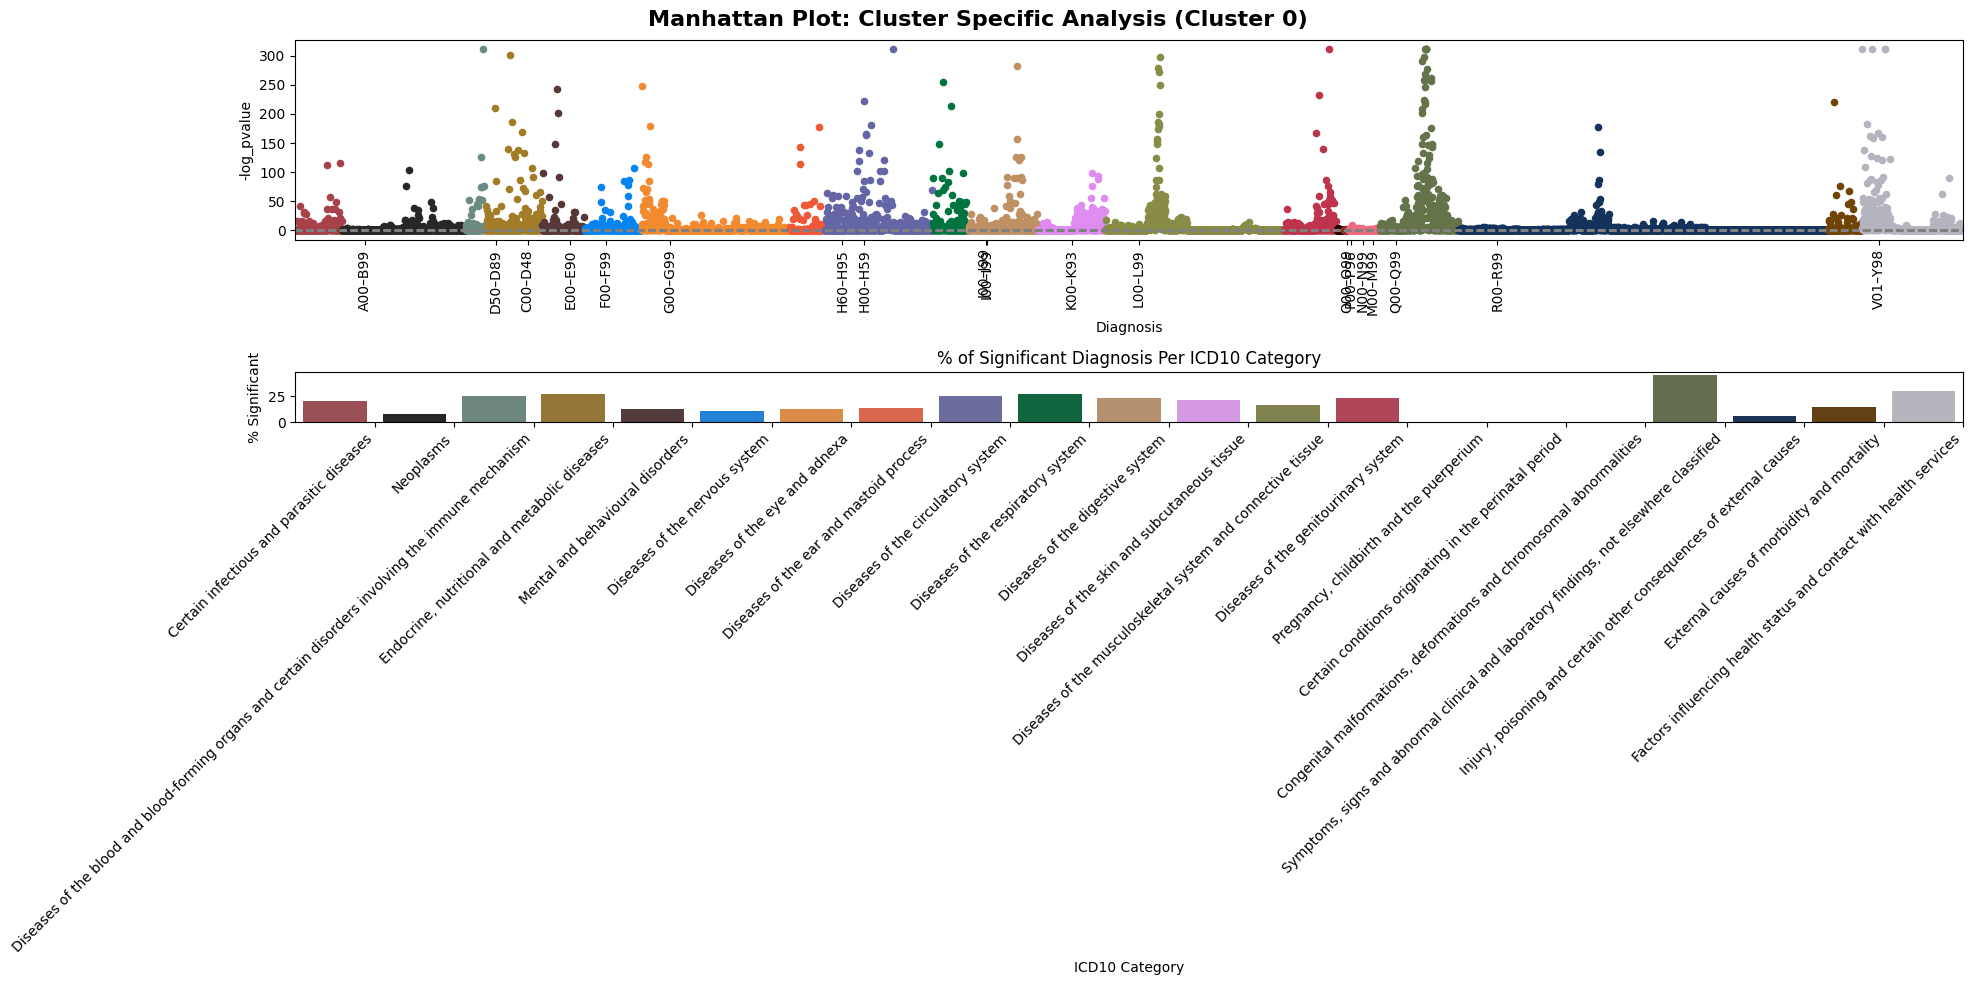

In [18]:
# Yの上位10個を取得
top_10_indices = cluster['-log_pvalue'].nlargest(10).index

# マンハッタンプロットの作成
fig, (ax, ax_sig) = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [4, 1]})
x_labels = []
x_labels_pos = []

# メインプロット (マンハッタンプロット)
for num, (name, group) in enumerate(cluster_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='-log_pvalue', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[0] - group['ind'].iloc[-1]) / 2))


# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlim([0, len(cluster)])
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')
# グラフ全体のタイトルを設定
plt.suptitle('Manhattan Plot: Cluster Specific Analysis (Cluster 0)', fontsize=16, fontweight='bold')

'''
# Yの上位10個のデータポイントにラベルを追加
for i in top_10_indices:
    row = cluster.loc[i]
    y_offset = 0.05 if row['-log_pvalue'] > 0 else -0.05
    ax.text(row['ind'], row['-log_pvalue'] + y_offset, row['ICD10'], fontsize=8, rotation=45, ha='center')
    ax.plot([row['ind'], row['ind']], [row['-log_pvalue'], row['-log_pvalue'] + y_offset], color='gray', linestyle='-', linewidth=0.5)
'''
# ボンフェローニ補正による有意水準と％Significantの計算
bc = 0.05 / len(cluster)
percent_significant = (cluster['-log_pvalue'] > -np.log10(bc)).mean() * 100

# バーグラフで％Significantの診断ブロックごとに表示
icd10dict = []
for value, g in cluster.groupby('ICD10_chape'):
    significant_percentage = ((g['pvalue'] < bc).sum() * 100) / g.shape[0]
    icd10dict.append([value, significant_percentage])
icd10sig = pd.DataFrame(icd10dict, columns=['Category', 'Percent_Significant']).set_index('Category')

icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

sns.barplot(x=icd10sig.index, y=icd10sig['Percent_Significant'], palette=rand_colors, ax=ax_sig)
plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
ax_sig.set_xticklabels(ax_sig.get_xticklabels(), rotation=45, ha='right')
ax_sig.set_ylabel('% Significant')
ax_sig.set_xlabel('ICD10 Category')
ax_sig.set_title('% of Significant Diagnosis Per ICD10 Category')

plt.tight_layout()
plt.show()

In [19]:
# -log_pvalueが大きく、かつオッズ比が大きい順
top_10_df = cluster.sort_values(by=['-log_pvalue', 'OddsRatio'], ascending=[False, False]).head(10)

In [20]:
top_10_df.to_csv('labels_manhattan_c0.csv', index=False)

In [21]:
icd10sig['Percent_Significant'].nlargest(3)

Category
R00–R99    45.510204
Z00–Z99    29.857820
J00–J99    27.354260
Name: Percent_Significant, dtype: float64

# Cluster 1

In [22]:
cluster = data[data['Cluster']==1]

In [23]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


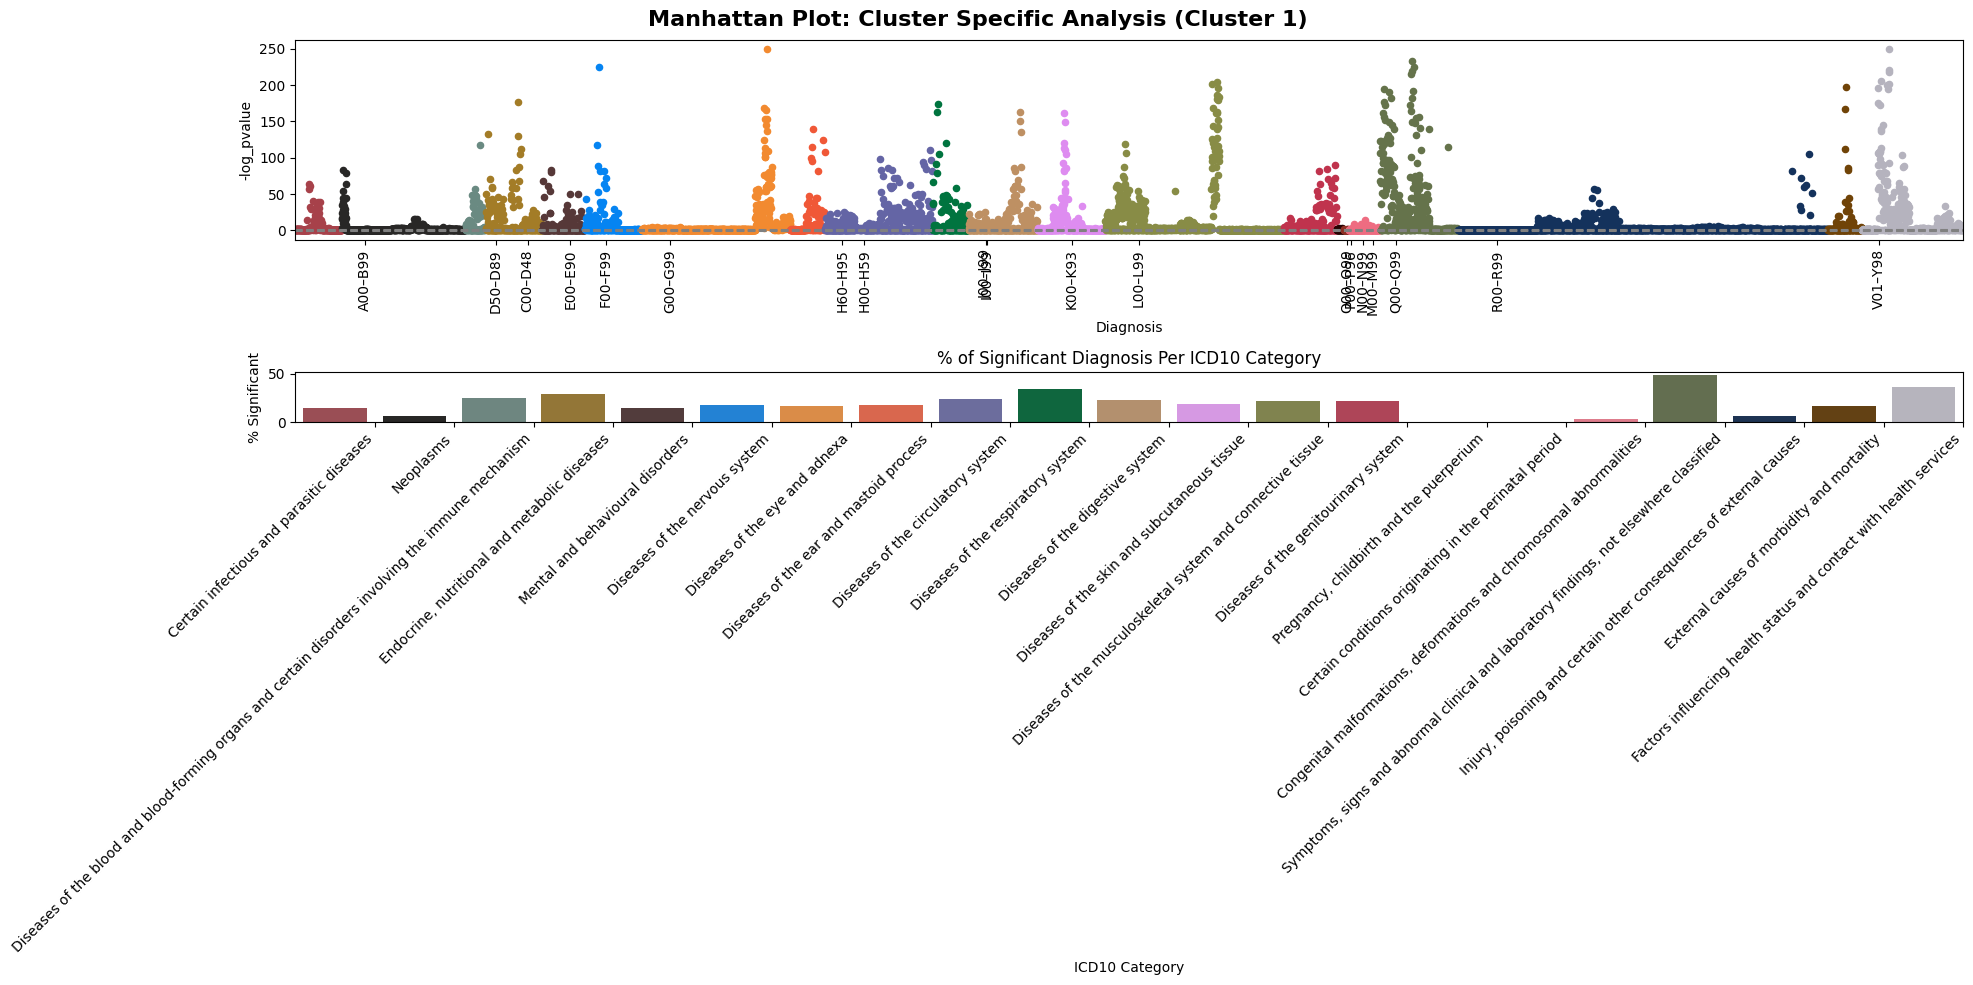

In [24]:
# Yの上位10個を取得
top_10_indices = cluster['-log_pvalue'].nlargest(10).index

# マンハッタンプロットの作成
fig, (ax, ax_sig) = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [4, 1]})
x_labels = []
x_labels_pos = []

# メインプロット (マンハッタンプロット)
for num, (name, group) in enumerate(cluster_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='-log_pvalue', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[0] - group['ind'].iloc[-1]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlim([0, len(cluster)])
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')
# グラフ全体のタイトルを設定
plt.suptitle('Manhattan Plot: Cluster Specific Analysis (Cluster 1)', fontsize=16, fontweight='bold')

'''
# Yの上位10個のデータポイントにラベルを追加
for i in top_10_indices:
    row = cluster.loc[i]
    y_offset = 0.05 if row['-log_pvalue'] > 0 else -0.05
    ax.text(row['ind'], row['-log_pvalue'] + y_offset, row['ICD10'], fontsize=8, rotation=45, ha='center')
    ax.plot([row['ind'], row['ind']], [row['-log_pvalue'], row['-log_pvalue'] + y_offset], color='gray', linestyle='-', linewidth=0.5)
'''

# ボンフェローニ補正による有意水準と％Significantの計算
bc = 0.05 / len(cluster)
percent_significant = (cluster['-log_pvalue'] > -np.log10(bc)).mean() * 100

# バーグラフで％Significantの診断ブロックごとに表示
icd10dict = []
for value, g in cluster.groupby('ICD10_chape'):
    significant_percentage = ((g['pvalue'] < bc).sum() * 100) / g.shape[0]
    icd10dict.append([value, significant_percentage])
icd10sig = pd.DataFrame(icd10dict, columns=['Category', 'Percent_Significant']).set_index('Category')

icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

sns.barplot(x=icd10sig.index, y=icd10sig['Percent_Significant'], palette=rand_colors, ax=ax_sig)
plt.xticks(np.arange(len(icd10order)) + .5, icd10order)

ax_sig.set_xticklabels(ax_sig.get_xticklabels(), rotation=45, ha='right')
ax_sig.set_ylabel('% Significant')
ax_sig.set_xlabel('ICD10 Category')
ax_sig.set_title('% of Significant Diagnosis Per ICD10 Category')

plt.tight_layout()
plt.show()

In [25]:
# -log_pvalueが大きく、かつオッズ比が大きい順
top_10_df = cluster.sort_values(by=['-log_pvalue', 'OddsRatio'], ascending=[False, False]).head(10)

In [26]:
top_10_df.to_csv('labels_manhattan_c1.csv', index=False)

In [27]:
icd10sig['Percent_Significant'].nlargest(3)

Category
R00–R99    48.979592
Z00–Z99    36.018957
J00–J99    34.529148
Name: Percent_Significant, dtype: float64

# Cluster 2

In [28]:
cluster = data[data['Cluster']==2]

In [29]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


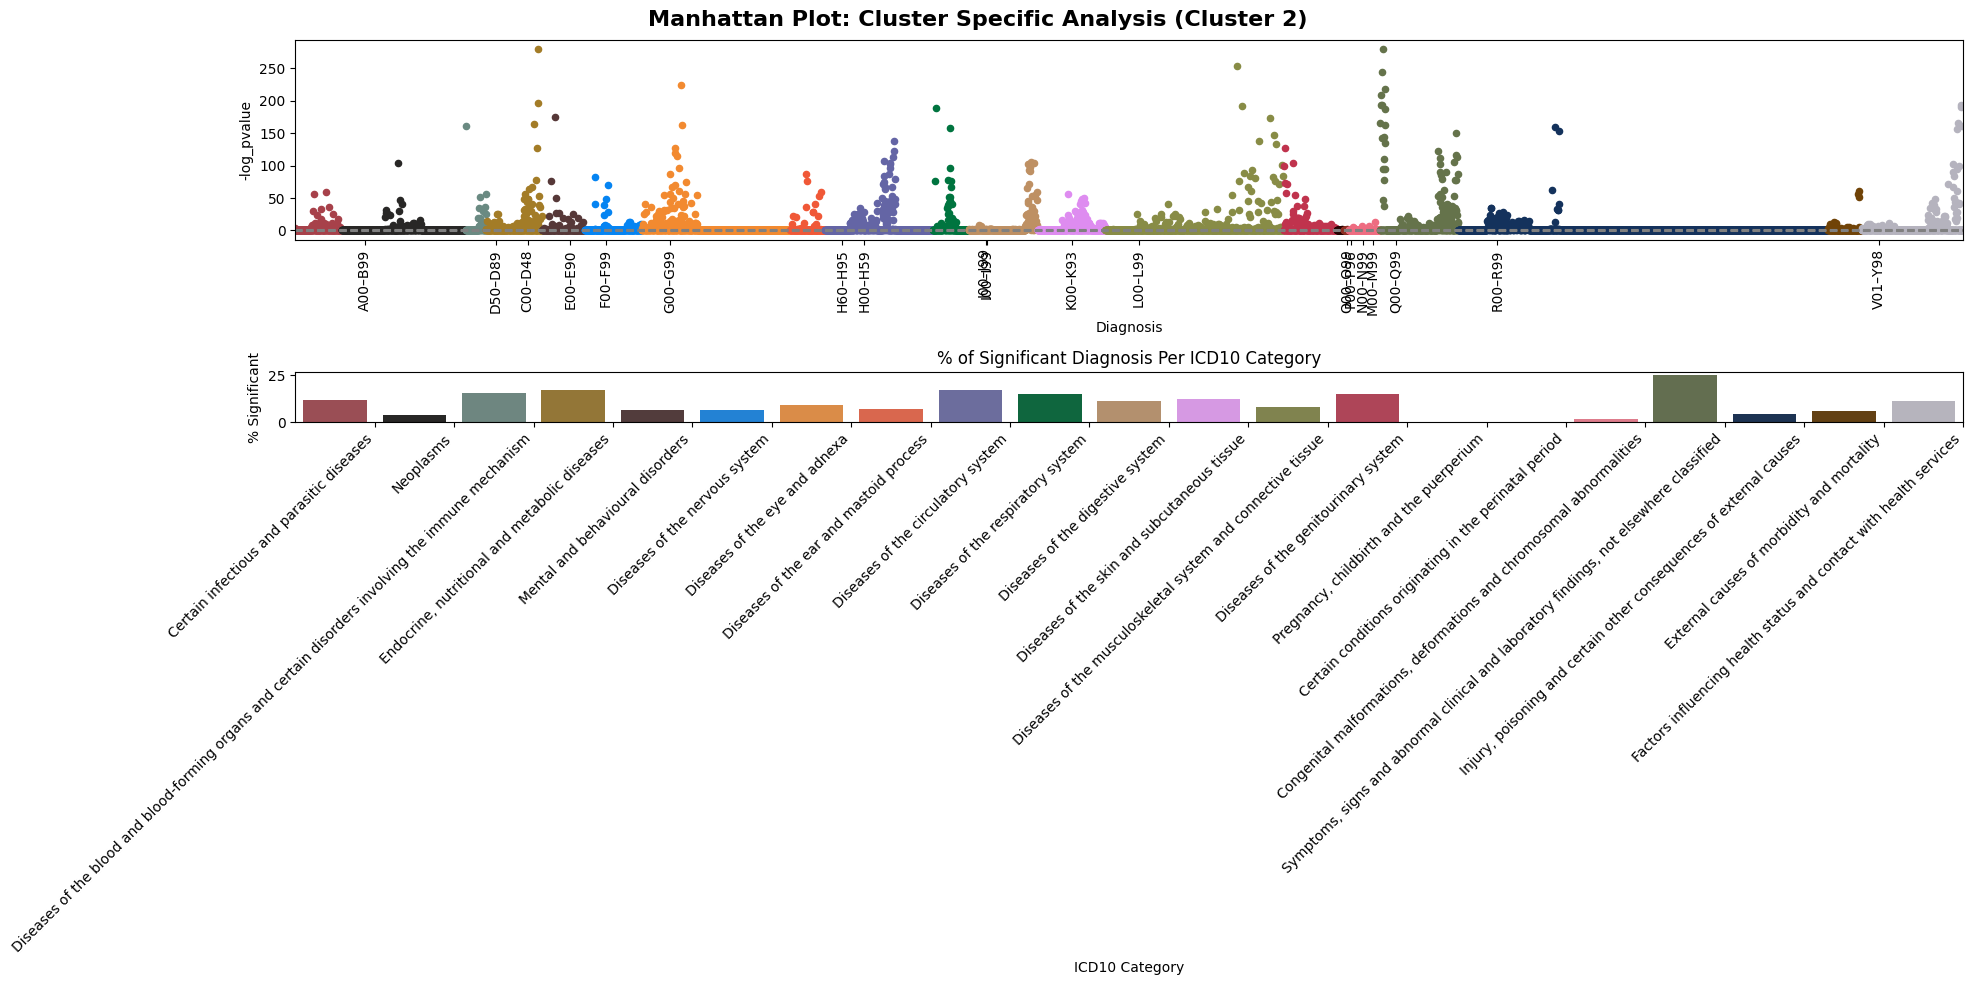

In [30]:
# Yの上位10個を取得
top_10_indices = cluster['-log_pvalue'].nlargest(10).index

# マンハッタンプロットの作成
fig, (ax, ax_sig) = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [4, 1]})
x_labels = []
x_labels_pos = []

# メインプロット (マンハッタンプロット)
for num, (name, group) in enumerate(cluster_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='-log_pvalue', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[0] - group['ind'].iloc[-1]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlim([0, len(cluster)])
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')
# グラフ全体のタイトルを設定
plt.suptitle('Manhattan Plot: Cluster Specific Analysis (Cluster 2)', fontsize=16, fontweight='bold')

'''
# Yの上位10個のデータポイントにラベルを追加
for i in top_10_indices:
    row = cluster.loc[i]
    y_offset = 0.05 if row['-log_pvalue'] > 0 else -0.05
    ax.text(row['ind'], row['-log_pvalue'] + y_offset, row['ICD10'], fontsize=8, rotation=45, ha='center')
    ax.plot([row['ind'], row['ind']], [row['-log_pvalue'], row['-log_pvalue'] + y_offset], color='gray', linestyle='-', linewidth=0.5)
'''

# ボンフェローニ補正による有意水準と％Significantの計算
bc = 0.05 / len(cluster)
percent_significant = (cluster['-log_pvalue'] > -np.log10(bc)).mean() * 100

# バーグラフで％Significantの診断ブロックごとに表示
icd10dict = []
for value, g in cluster.groupby('ICD10_chape'):
    significant_percentage = ((g['pvalue'] < bc).sum() * 100) / g.shape[0]
    icd10dict.append([value, significant_percentage])
icd10sig = pd.DataFrame(icd10dict, columns=['Category', 'Percent_Significant']).set_index('Category')

icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

sns.barplot(x=icd10sig.index, y=icd10sig['Percent_Significant'], palette=rand_colors, ax=ax_sig)
plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
ax_sig.set_xticklabels(ax_sig.get_xticklabels(), rotation=45, ha='right')
ax_sig.set_ylabel('% Significant')
ax_sig.set_xlabel('ICD10 Category')
ax_sig.set_title('% of Significant Diagnosis Per ICD10 Category')

plt.tight_layout()
plt.show()

In [31]:
# -log_pvalueが大きく、かつオッズ比が大きい順
top_10_df = cluster.sort_values(by=['-log_pvalue', 'OddsRatio'], ascending=[False, False]).head(10)

In [32]:
top_10_df.to_csv('labels_manhattan_c2.csv', index=False)

In [33]:
icd10sig['Percent_Significant'].nlargest(3)

Category
R00–R99    25.306122
I00–I99    17.159763
E00–E90    16.997167
Name: Percent_Significant, dtype: float64

# Cluster 3

In [34]:
cluster = data[data['Cluster']==3]

In [35]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


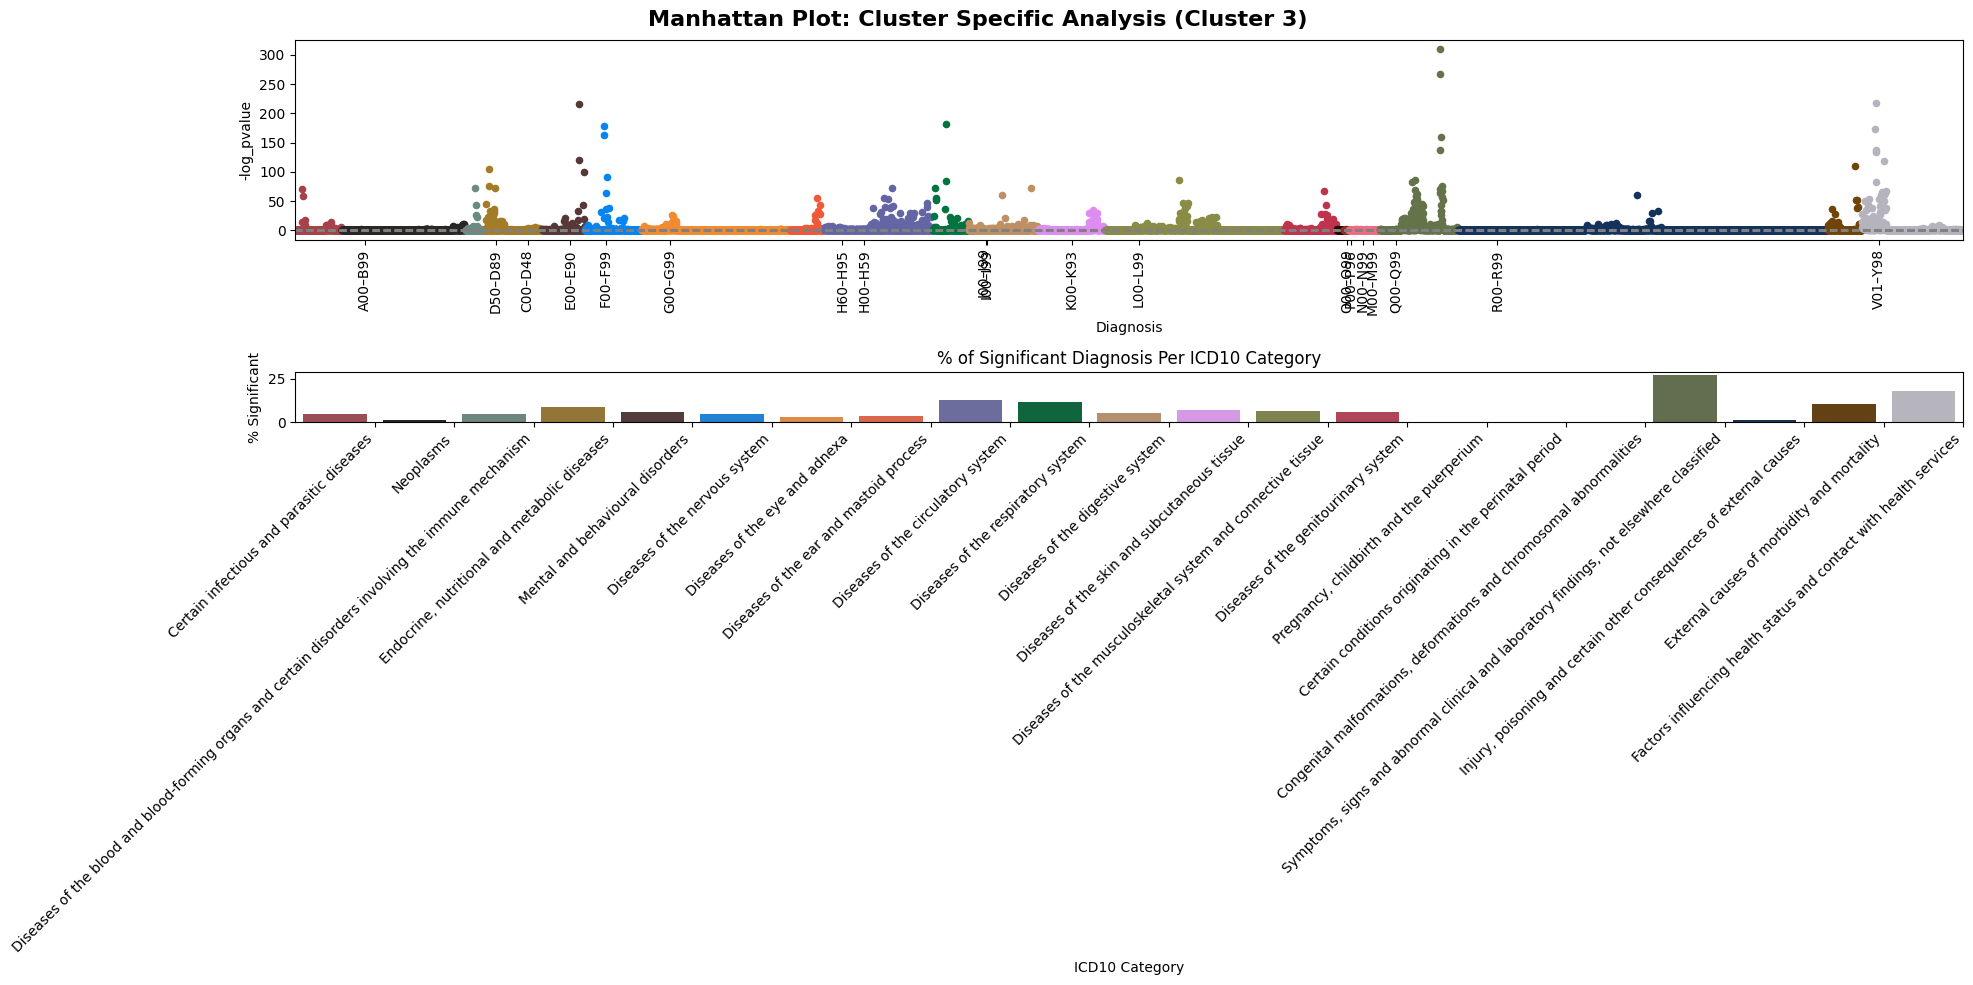

In [36]:
# Yの上位10個を取得
top_10_indices = cluster['-log_pvalue'].nlargest(10).index

# マンハッタンプロットの作成
fig, (ax, ax_sig) = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [4, 1]})
x_labels = []
x_labels_pos = []

# メインプロット (マンハッタンプロット)
for num, (name, group) in enumerate(cluster_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='-log_pvalue', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[0] - group['ind'].iloc[-1]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlim([0, len(cluster)])
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')
# グラフ全体のタイトルを設定
plt.suptitle('Manhattan Plot: Cluster Specific Analysis (Cluster 3)', fontsize=16, fontweight='bold')

'''
# Yの上位10個のデータポイントにラベルを追加
for i in top_10_indices:
    row = cluster.loc[i]
    y_offset = 0.05 if row['-log_pvalue'] > 0 else -0.05
    ax.text(row['ind'], row['-log_pvalue'] + y_offset, row['ICD10'], fontsize=8, rotation=45, ha='center')
    ax.plot([row['ind'], row['ind']], [row['-log_pvalue'], row['-log_pvalue'] + y_offset], color='gray', linestyle='-', linewidth=0.5)
'''

# ボンフェローニ補正による有意水準と％Significantの計算
bc = 0.05 / len(cluster)
percent_significant = (cluster['-log_pvalue'] > -np.log10(bc)).mean() * 100

# バーグラフで％Significantの診断ブロックごとに表示
icd10dict = []
for value, g in cluster.groupby('ICD10_chape'):
    significant_percentage = ((g['pvalue'] < bc).sum() * 100) / g.shape[0]
    icd10dict.append([value, significant_percentage])
icd10sig = pd.DataFrame(icd10dict, columns=['Category', 'Percent_Significant']).set_index('Category')

icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

sns.barplot(x=icd10sig.index, y=icd10sig['Percent_Significant'], palette=rand_colors, ax=ax_sig)
plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
ax_sig.set_xticklabels(ax_sig.get_xticklabels(), rotation=45, ha='right')
ax_sig.set_ylabel('% Significant')
ax_sig.set_xlabel('ICD10 Category')
ax_sig.set_title('% of Significant Diagnosis Per ICD10 Category')

plt.tight_layout()
plt.show()

In [37]:
# -log_pvalueが大きく、かつオッズ比が大きい順
top_10_df = cluster.sort_values(by=['-log_pvalue', 'OddsRatio'], ascending=[False, False]).head(10)

In [38]:
top_10_df.to_csv('labels_manhattan_c3.csv', index=False)

In [39]:
icd10sig['Percent_Significant'].nlargest(3)

Category
R00–R99    27.346939
Z00–Z99    17.851501
I00–I99    12.869822
Name: Percent_Significant, dtype: float64

# Cluster 4

In [40]:
cluster = data[data['Cluster']==4]

In [41]:
# プロットの準備
cluster['ind'] = range(len(cluster))
cluster_icd_grouped = cluster.groupby(('ICD10_chape'))

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


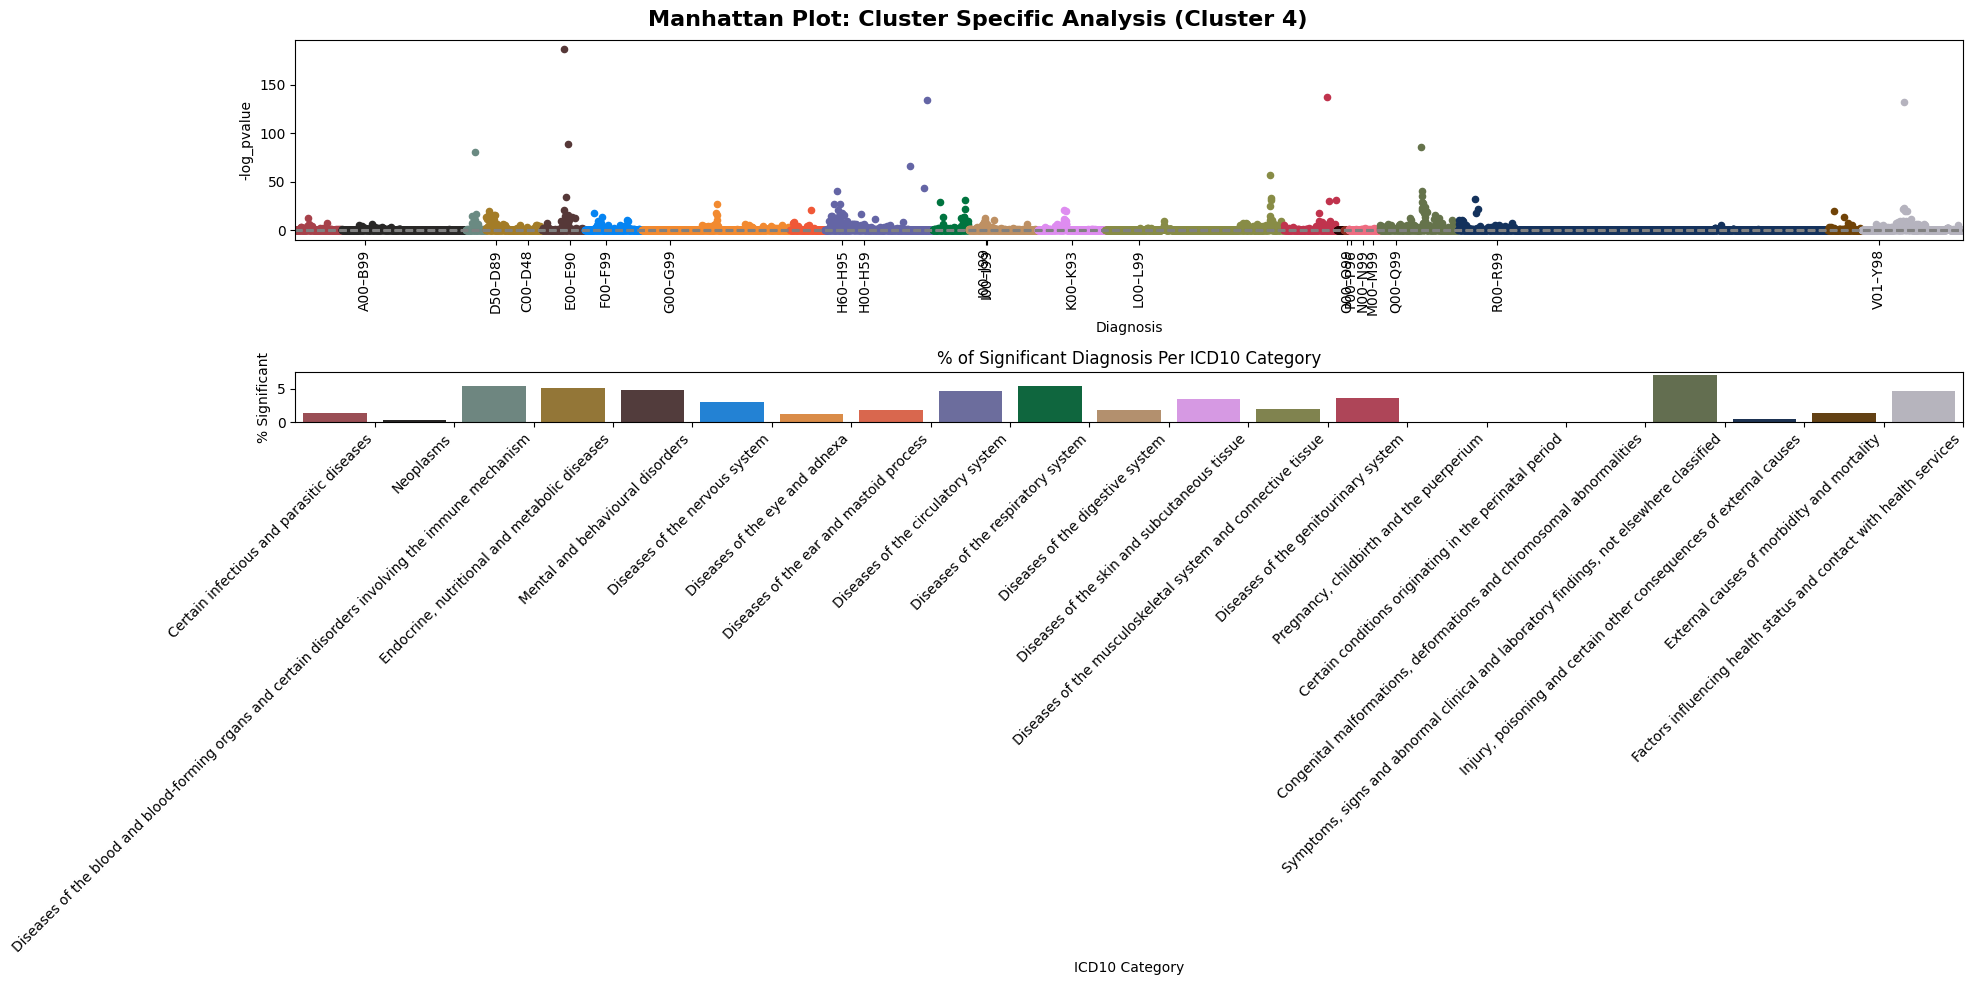

In [42]:
# Yの上位10個を取得
top_10_indices = cluster['-log_pvalue'].nlargest(10).index

# マンハッタンプロットの作成
fig, (ax, ax_sig) = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [4, 1]})
x_labels = []
x_labels_pos = []

# メインプロット (マンハッタンプロット)
for num, (name, group) in enumerate(cluster_icd_grouped):
    color = rand_colors[num % len(rand_colors)]  # カラーリストから色を選択
    group.plot(kind='scatter', x='ind', y='-log_pvalue', color=color, ax=ax)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[0] - group['ind'].iloc[-1]) / 2))

# X軸のラベルと位置を設定
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_xlim([0, len(cluster)])
ax.set_xlabel('Diagnosis')

# 破線を引く
ax.axhline(y=0.2, linestyle='--', color='gray')
ax.axhline(y=-0.2, linestyle='--', color='gray')
# グラフ全体のタイトルを設定
plt.suptitle('Manhattan Plot: Cluster Specific Analysis (Cluster 4)', fontsize=16, fontweight='bold')

'''
# Yの上位10個のデータポイントにラベルを追加
for i in top_10_indices:
    row = cluster.loc[i]
    y_offset = 0.05 if row['-log_pvalue'] > 0 else -0.05
    ax.text(row['ind'], row['-log_pvalue'] + y_offset, row['ICD10'], fontsize=8, rotation=45, ha='center')
    ax.plot([row['ind'], row['ind']], [row['-log_pvalue'], row['-log_pvalue'] + y_offset], color='gray', linestyle='-', linewidth=0.5)
'''

# ボンフェローニ補正による有意水準と％Significantの計算
bc = 0.05 / len(cluster)
percent_significant = (cluster['-log_pvalue'] > -np.log10(bc)).mean() * 100

# バーグラフで％Significantの診断ブロックごとに表示
icd10dict = []
for value, g in cluster.groupby('ICD10_chape'):
    significant_percentage = ((g['pvalue'] < bc).sum() * 100) / g.shape[0]
    icd10dict.append([value, significant_percentage])
icd10sig = pd.DataFrame(icd10dict, columns=['Category', 'Percent_Significant']).set_index('Category')

icd10order = list(map(ICDchapter_to_name, cluster['ICD10_chape'].explode().sort_values().unique()))

sns.barplot(x=icd10sig.index, y=icd10sig['Percent_Significant'], palette=rand_colors, ax=ax_sig)
plt.xticks(np.arange(len(icd10order)) + .5, icd10order)
ax_sig.set_xticklabels(ax_sig.get_xticklabels(), rotation=45, ha='right')
ax_sig.set_ylabel('% Significant')
ax_sig.set_xlabel('ICD10 Category')
ax_sig.set_title('% of Significant Diagnosis Per ICD10 Category')

plt.tight_layout()
plt.show()

In [43]:
# -log_pvalueが大きく、かつオッズ比が大きい順
top_10_df = cluster.sort_values(by=['-log_pvalue', 'OddsRatio'], ascending=[False, False]).head(10)

In [44]:
top_10_df.to_csv('labels_manhattan_c4.csv', index=False)

In [45]:
icd10sig['Percent_Significant'].nlargest(3)

Category
R00–R99    7.142857
D50–D89    5.511811
J00–J99    5.381166
Name: Percent_Significant, dtype: float64